In [26]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns 
import warnings
from scipy import stats
from PIL import Image
from tqdm import tqdm,trange

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "malgun gothic",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 1
}

plt.rc('axes', unicode_minus=False)
sns.set(rc=rc)
warnings.filterwarnings(action = 'ignore')

# **큰 수의 법칙 시뮬레이션**

큰 수의 법칙이란 어떤 분포를 따르는 모집단에서 사건을 n 개 추출한 표본들의 평균이 모평균에 수렴한다는 법칙이다.

표본 평균은 확률 변수임을 먼저 알고 가야 이후 이해가 쉽다

표본의 평균은 어떤 상수 값으로 나오기 때문에 확률 변수라는 것을 직관적으로 받아들이기 힘들지만 

어떻게 표본을 추출하며, 몇 개를 추출하냐에 따라 표본 평균 값이 항상 변하기 때문에 확률 변수이다

$X^{mean} = \frac{1}{n} \sum_{i=1}^{n} X_i  [X_i 는 i.i.d]$

$E[\frac{1}{n} \sum_{i=1}^n X_i]$

$=\frac{1}{n} E[\sum_{i=1}^n X_i]$

$=\frac{1}{n} \cdot n \cdot E[\mu]$

$= \mu$

로 증명 할 수 있다. 

시뮬레이션을 통해 이해해보자 

주사위를 n 번 던졌을 때의 기대값들을 n 이 커짐에 따라 기대값이 어느 값에 수렴할까 ? 

모집단의 확률 분포로 보면 기대값은 3.5임을 알고 있다.

시뮬레이션을 통해 사실인지 확인해보자 

100%|██████████| 500/500 [00:00<00:00, 1929.13it/s]


Text(0.5, 1.0, '주사위를 n 번 던졌을 때의 기대값 수렴')

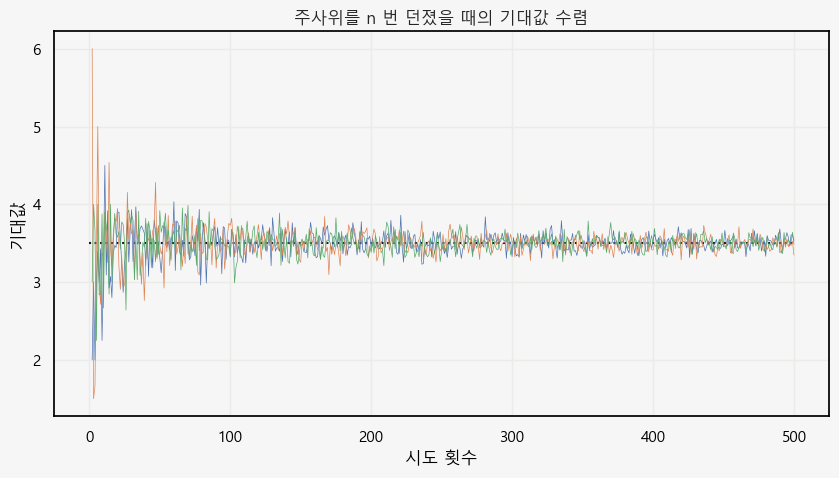

In [27]:
def dice():
    return np.random.randint(low = 1, high = 7)


    
fig,ax = plt.subplots(figsize = (10,5))

ax.plot([0,500],[3.5,3.5], 'k:')

for _ in range(3):
    
    mean = []
    
    for n in trange(500):
        mean.append(
            np.mean([dice() for d in range(n)])
        )
        
    ax.plot(range(1,500 + 1),mean, lw = 0.5)
    
ax.set_xlabel('시도 횟수')
ax.set_ylabel('기대값')
ax.set_title('주사위를 n 번 던졌을 때의 기대값 수렴')

이는 표본 사이즈인 n 이 커짐에 따라 표본의 평균이 모평균과 같아짐을 보여준다.

이것을 큰 수의 법칙이라 하며 큰 수의 법칙에는 2 가지 법칙이 있다.

1. 강한 큰 수의 법칙 

    n 이 커짐에 따라 표본의 평균은 모평균에 수렴한다. (점수렴)
2. 약한 큰 수의 법칙

    n 이 커짐에 따라 표본의 평균 - 모평균이 어떤 양수보다 클 확률이 0에 수렴한다. (구간 수렴)

인데 약한 큰 수의 법칙을 증명하면 강한 큰 수의 법칙은 자동으로 증명된다.

체비셰프 부등식으로 증명

$P(|X^{mean} - \mu| \ge C) [C는 0 이상의 수]$ 가 0에 가까워짐을 보이면 되는데 

체비셰프 부등식을 통해 

$ = P((X^{mean} - \mu)^2 \ge C^2) $

$ = P((X^{mean} - \mu)^2 \ge C^2) \le \frac{E[X^{mean} - \mu)^2]}{C^2}$

$ = P((X^{mean} - \mu)^2 \ge C^2) \le \frac{Var[X^{mean}]}{C^2}$

$X^{mean} 의 분산은 Var[\frac{1}{n} \sum_{i=1}^{n} X_i ]$

$= \frac{1}{n^2} Var[\sum_{i=1}^{n} X_i]$

$= \frac{1}{n^2} n \cdot \sigma^2$

$= \frac{1}{n}\sigma^2$

$ = P((X^{mean} - \mu)^2 \ge C^2) \le \frac{\sigma^2}{C^2 \cdot n}$


[n 이 커질 수록 $X^{mean} - \mu 가 0보다 클 확률이 0에 수렴한다$]

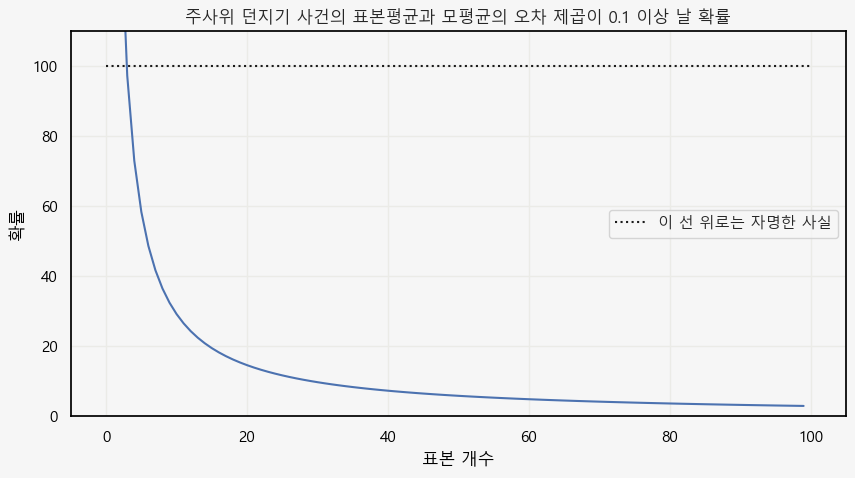

In [29]:
var = round(np.mean([i ** 2 for i in range(1,7)]) - 3.5 ** 2 , 2)

C = 0.1

fig,ax = plt.subplots(figsize = (10,5))

prop = [var / (C ** 2 * n) for n in range(1,100)]

ax.plot(range(1,100), prop)
ax.plot([0,100],[100,100], 'k:', label = '이 선 위로는 자명한 사실')
ax.set_ylim([0,110])
ax.set_xlabel('표본 개수')
ax.set_ylabel('확률')
ax.set_title('주사위 던지기 사건의 표본평균과 모평균의 오차 제곱이 0.1 이상 날 확률')
ax.legend()

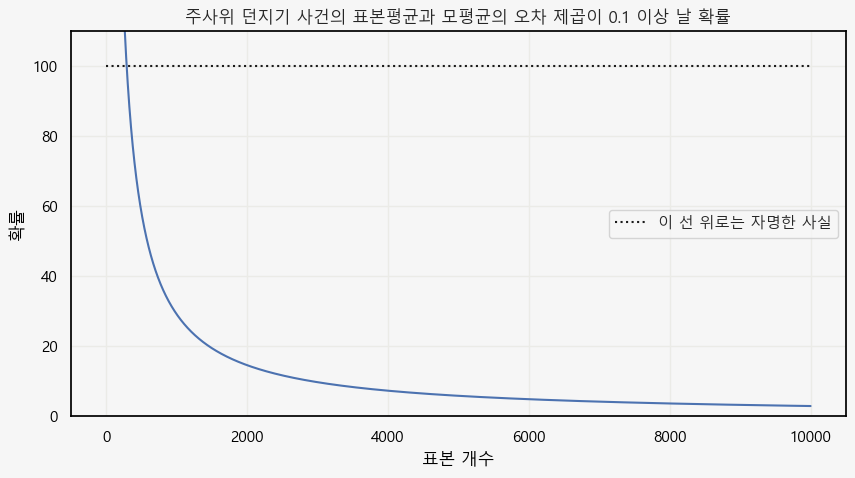

In [36]:
var = round(np.mean([i ** 2 for i in range(1,7)]) - 3.5 ** 2 , 2)

C = 0.01

fig,ax = plt.subplots(figsize = (10,5))

prop = [var / (C ** 2 * n) for n in range(1,10000)]

ax.plot(range(1,10000), prop)
ax.plot([0,10000],[100,100], 'k:', label = '이 선 위로는 자명한 사실')
ax.set_ylim([0,110])
ax.set_xlabel('표본 개수')
ax.set_ylabel('확률')
ax.set_title('주사위 던지기 사건의 표본평균과 모평균의 오차 제곱이 0.1 이상 날 확률')
ax.legend()

큰 수의 법칙을 통해 표본 평균의 기대값과 분산, 표준 편차를 구할 수 있었다.

기대값과 분산, 표준편차는 몇인지 구했으나

표본 평균의 분포 모양이 어떻게 생겼는지는 아직 모른다.

# **중심극한정리**



위 큰수의 법칙을 통해 어떤 분포를 따르는 모집단에서 표분을 n 개 추출하고, 그 n 이 충분히 크다면 

표본평균의 기대값은 모평균인 $\mu$ , 분산은 $\frac{\sigma^2}{n}$ , 표준 편차는 $\frac{\sigma}{\sqrt{n}}$ 을 따른 다는 사실을 알았다.

그렇다면 표본 평균들의 분포는 무엇과 같을까 ? 

표본 평균들의 분포는 n 이 충분히 커진다면 표본 평균들의 분포는 정규 분포를 따른다.

$N$~$(\mu, \frac{\sigma}{\sqrt{n}})$

그것이 모집단의 분포가 정규분포든, 정규 분포가 아니든, 어떤 괴상하게 생긴 분포든 상관 없이 정규 분포를 따른다.

그것이 바로 중심 극한 정리이다.

위와 같은 것으로 표준화 된 모집단에서 추출한 표본 평균의 분포는 표준 정규 분포를 따른다.

복잡한 증명을 하기 전에 시뮬레이션을 통해 이해해보자 

 대한민국 모든 고등학교 1학년 남학생들의 몸무게의 분포가 평균이 60이고 표준편차가 5인 정규분포를 따른다고 가정해보자 

 우리는 대한민국의 모든 고등학교의 남학생들의 몸무게의 분포를 추정하기 위해 여러 고등학교에서 남학생들의 몸무게를 반복적으로 측정해볼 것이다.

Text(0, 0.5, '확률밀도')

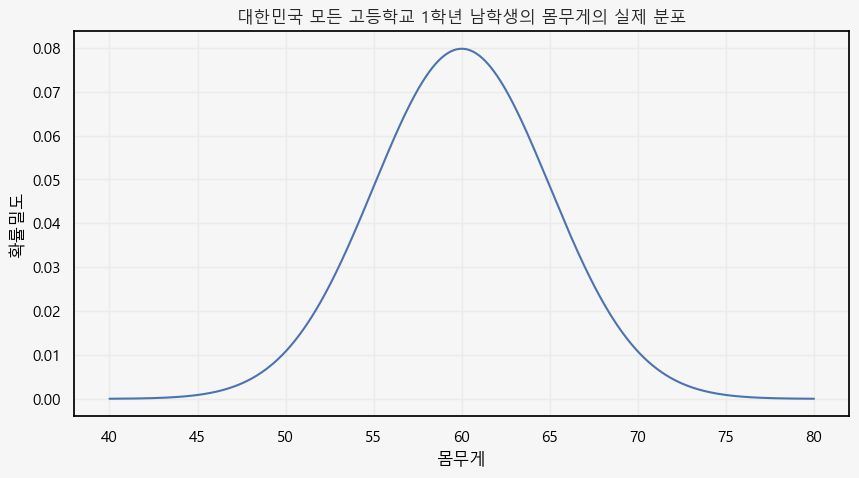

In [2]:
# 모집단이 평균이 60이고 표준편차가 5인 정규 분포를 따른다고 가정해보자

mother_distributon = stats.norm(loc = 60, scale = 5)

weight = np.linspace(40,80,1000)

fig,ax = plt.subplots(figsize = (10,5))

sns.lineplot(
    x = weight,
    y = mother_distributon.pdf(weight),
    ax = ax
)

ax.set_title('대한민국 모든 고등학교 1학년 남학생의 몸무게의 실제 분포')
ax.set_xlabel('몸무게')
ax.set_ylabel('확률밀도')

100 개의 고등학교를 돌면서 각 학교에서 50명씩 몸무게를 측정하고, 각 학생들의 몸무게를 평균 내어 기록하기로 했다. 

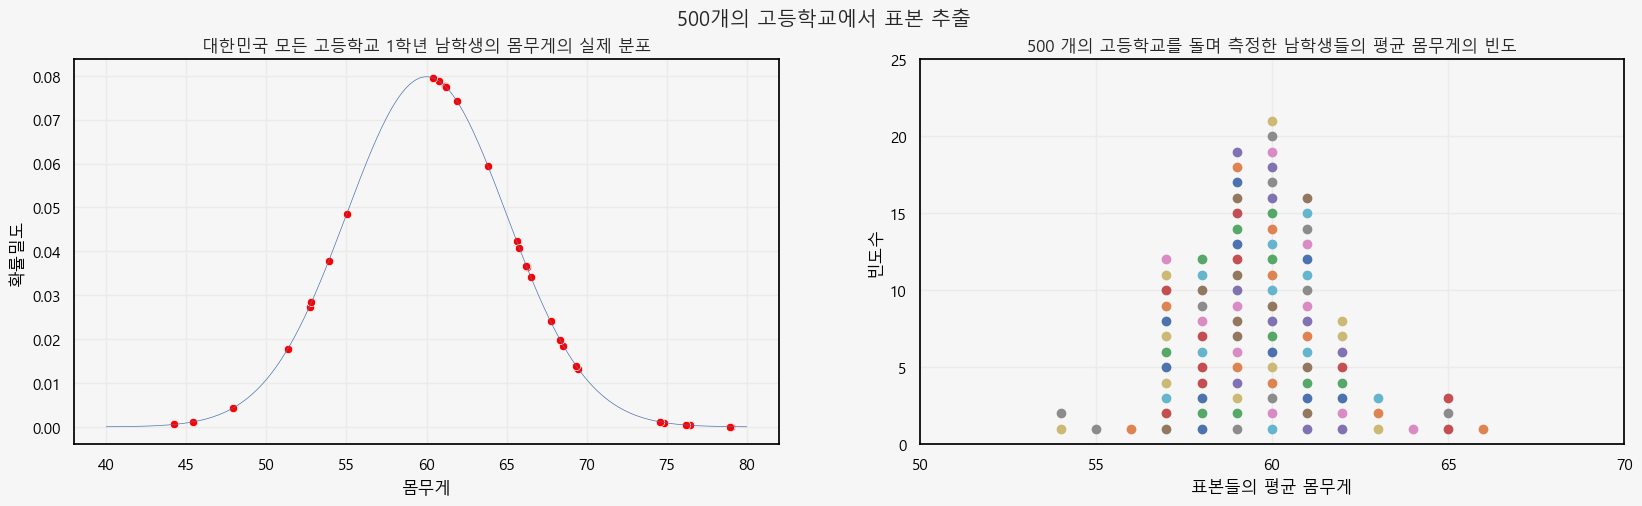

In [53]:
import random
from collections import defaultdict
import os

file_path = "C:/Users/whileduck/Desktop/큰수의법칙 시뮬레이션/"

fig,ax = plt.subplots(ncols = 2,figsize = (20,5))

ax[1].set_title('500 개의 고등학교를 돌며 측정한 남학생들의 평균 몸무게의 빈도')
ax[1].set_xlabel('표본들의 평균 몸무게')
ax[1].set_ylabel('빈도수')
ax[1].set_xlim([50,70])
ax[1].set_xticks([tick for tick in range(50,75,5)])
ax[1].set_ylim([0,25])
fig.suptitle('500개의 고등학교에서 표본 추출')


n = 100

student_weights = defaultdict(int)

for i in range(n):
    
    sw = [random.choice(weight) for _ in range(30)]
    
    sw_mean = int(np.mean(sw))
    
    student_weights[sw_mean] += 1 # 표본 평균이 쌓일 때 마다 count += 1 
    
    ax[0].cla()
    
    sns.scatterplot(
        x = sw,
        y = mother_distributon.pdf(sw),
        c = 'red',
        ax = ax[0]
    )
    
    sns.lineplot(
    x = weight,
    y = mother_distributon.pdf(weight),
    lw = 0.5,
    ax = ax[0])
    
    ax[0].set_title('대한민국 모든 고등학교 1학년 남학생의 몸무게의 실제 분포')
    ax[0].set_xlabel('몸무게')
    ax[0].set_ylabel('확률밀도')
    
    ax[1].scatter(
        x = sw_mean,
        y = student_weights[sw_mean],
    )
    
    full_path = os.path.join(file_path + f'random_sample_{i}.png')
    
    fig.savefig(full_path)    

In [60]:
# gif 파일로 만들기 

import imageio

images = []

for i in range(100):
    
    png_neme = f'random_sample_{i}.png'
    
    full_path = os.path.join(file_path,png_neme)
    
    images.append(Image.open(full_path))
    
output_path = os.path.join(file_path,'simulation.gif')

imageio.mimsave(output_path, images, duration = 0.05)

표본들의 개수가 늘어남에 따라 표본 평균의 분포가 정규 분포 형태로 쌓여가는 것을 볼 수 있다. 

이것은 그저 모집단의 분포가 정규 분포여서가 아니다

이산확률분포인 베르누이 분포를 따르는 사건들을 n 개 모은 이항 분포의 모양을 생각해 본다면 

그것 또한 정규 분포 모양을 따르는 것을 기억 할 수 있다.

**중심극한정리는 모집단의 분포가 어떤 모양이든간과 상관 없이 n 이 충분히 커진다면 표본 평균의 분포는 정규 분포를 따른다는 것이다.**

Text(0.5, 0.98, '균등분포에서 추출한 표본평균들의 분포')

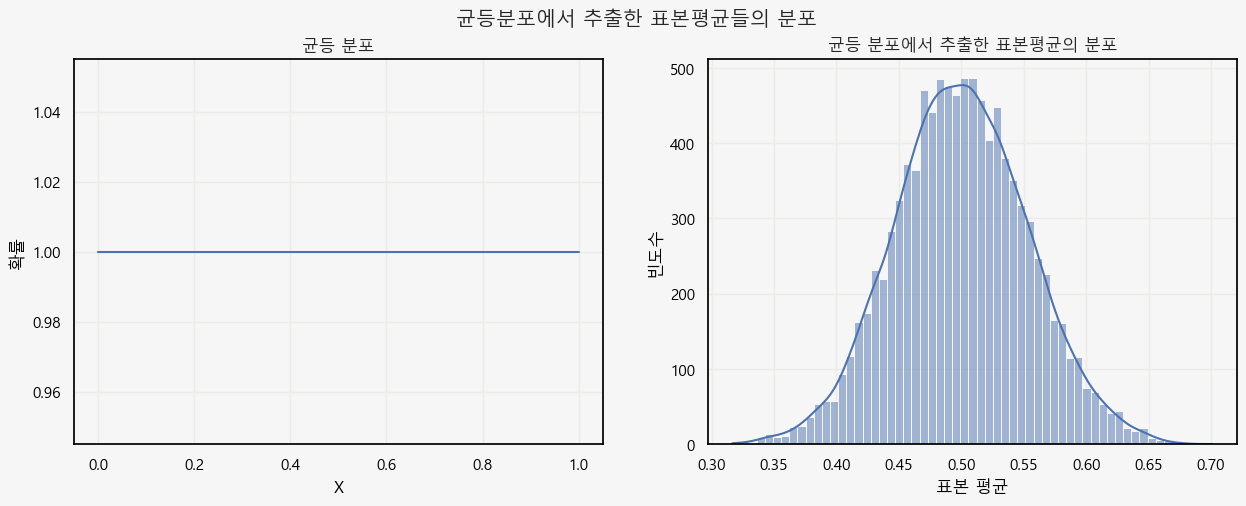

In [25]:
fig,ax = plt.subplots(ncols = 2, figsize = (15,5))

uniform = [np.random.uniform() for _ in range(10000)]

uniform_samples = []

for _ in range(10000):
    
    sample_mean = np.mean([np.random.uniform() for _ in range(30)])
    
    uniform_samples.append(sample_mean)
    
sns.histplot(
    x = uniform_samples,
    kde = True,
    ax = ax[1]
)    

ax[0].plot([0,1],[1,1])
ax[0].set_title('균등 분포')
ax[0].set_xlabel('X')
ax[0].set_ylabel('확률')

ax[1].set_title('균등 분포에서 추출한 표본평균의 분포')
ax[1].set_xlabel('표본 평균')
ax[1].set_ylabel('빈도수')

fig.suptitle('균등분포에서 추출한 표본평균들의 분포')

균등 분포에서 추출한 표본평균들의 분포들 또한 정규 분포 모양으로 나오는 것을 볼 수 있다.

# **증명**

표본 평균의 분포가 정규 분포와 같은지를 확인하기 위해서는  

표본 평균의 적률 생성 함수와 정규 분포의 적률 생성 함수가 같은지를 확인해보면 된다. 

\begin{aligned}

X^{mean} = \frac{1}{n}\sum_{i = 1} ^ {n}X_i  = \frac{1}{n}S_n

\end{aligned}
으로 표기 할 수 있다. 

표본 평균의 분포가 정규 분포와 같다는 것은, 표준화 된 표본 평균의 분포는 표준 정규 분포와 같다는 것과 같다. 

표준 정규 분포의 MGF 가 좀 더 직관적이니 표준화 된 표본 평균의 분포가 표준 정규 분포를 따르는지를 확인해보자 

표준화 된 표본 평균의 분포 

\begin{aligned}


Normalized \  Sample \ Mean \ distribution = {\frac{\frac{1}{n}S_n - \mu}{\frac{\sigma}{\sqrt{n}}}}

= \frac{S_n - n \mu}{\sigma \cdot \sqrt{n}}

\end{aligned}

표본 평균의 기대값은 모집단의 평균인 $\mu$ 이고 표준편차는 $\frac{\sigma}{\sqrt{n}}$ 이였다.

계산의 편의성을 위해 모집단의 평균과 표준편차가 0과 1이라고 해보자 .

그저 모집단도 표준화가 된 후 표본 평균을 샘플링 한거라고 생각하며 되며 차이는 없다

\begin{aligned}

Normalized \  Sample \ Mean \ distribution = \frac{S_n}{\sqrt{n}}

\end{aligned}


표준화 된 표준 정규 분포의 MGF 를 구해보자

우선 표준화 된 표준 정규 분포의 MGF 를 기대값의 선형성을 통해 이렇게 나타낼 수 있다.

\begin{aligned}

M_x(t) = E[e^{t \cdot \frac{S_n}{\sqrt{n}}}]\\
= E[e^{\frac{t}{\sqrt{n}}\cdot(X_1 + X_2 + .... + X_n}] [기대값의 선형성, X_i 들은 모두 i.i.d] \\
= E[e^{\frac{t \cdot x_1}{\sqrt{n}}}]^n

\end{aligned}

우리는 이제 $E[e^{\frac{t \cdot x_1}{\sqrt{n}}}]^n$ 가 표준 정규 분포의 MGF 인 $e^{\frac{t^2}{2}}$ 형태로 나타나는지만 확인해보면 된다.

\begin{gathered}

E[e^{\frac{t \cdot x_1}{\sqrt{n}}}]^n = e^{\frac{t^2}{2}} ?!  \\\\


양\ 변에 \ 로그를\  취해주어서 \ 지수를\  빼주자 \\\\

n \cdot \ln^{E[e^{\frac{t \cdot x_1}{\sqrt{n}}}]} = \frac{t^2}{2} ?? \\\\

로피탈 \ 정리를 \ 이용할 것이기에 \ 로피탈\ 정리를 \ 활용\  할\ 수\  있도록\ 변경해주자  \\\\ 

\frac{\ln^{E[e^{\frac{t \cdot x_1}{\sqrt{n}}}]}}{\frac{1}{n}} = \frac{t^2}{2} ?? \\\\

중심 \ 극한 \ 정리는 n이 \ 무한히\  커지기 때문에 \\\\ 

\lim_{n -> \infty} \frac{\ln^{E[e^{\frac{t \cdot x_1}{\sqrt{n}}}]}}{\frac{1}{n}} = \frac{t^2}{2} ?? \\\\

를\ 묻는 \ 것과 \ 같음

원활한 \ 계산을 \ 위해 \ 몇 \ 가지 \ 치환을 \ 해보자 \\\\

1. E[e^{\frac{t \cdot x_1}{\sqrt{n}}}] 은 \ \frac{x_1}{\sqrt{n}} 에\  대한\  MGF\  이기도\  하면서\  \frac{t}{\sqrt{n}} 의 \ MGF \  이기도 \  함 \\\\

[미분하고 \ 값을 \ 넣는 주체를 \ t 로 할 것인지 \ x_1으로 \ 할 \ 것 \ 인지만 \ 다르게 \ 하면 \ 됨] \\\\

E[e^{\frac{t \cdot x_1}{\sqrt{n}}}] = M_t(\frac{x_1}{\sqrt{n}}) = M_x(\frac{t}{\sqrt{n}})

2. \frac{1}{\sqrt{n}} = Y 로 치환해보자 \\\\

n -> \infty 일 때 \ Y -> 0

두\ 가지\ 치환을 \ 한 \ 이후의 \ 식은 \\\\

\lim_{Y -> 0} \frac{\ln^{M_x(t \cdot Y)}}{Y^2} = \frac{t^2}{2} ?? \\\\

여전히 \ 로피탈\ 정리를\  사용\ 할 \ 수 \ 있으니 \ 분자,분모를 \ 미분해주자\\\\

\frac{1}{dy} \lim_{Y -> 0} \frac{\ln^{M_x(t \cdot Y)}}{Y^2} = \lim_{Y -> 0} \frac{t \cdot M_x^{'}(tY) }{2Y \cdot M_x(tY)} = \frac{t}{2} \lim_{Y -> 0} \frac{ M_x^{'}(tY) }{Y \cdot M_x(tY)}  \\\\

여전히 \ \frac{0}{0}\ 형태이다. \  M_x(tY) = 1, M_x(tY)^{'} = \mu  = 0 \\\\

\frac{t}{2} \lim_{Y -> 0} \frac{ M_x^{'}(tY) }{Y} \ 를 \ 한 \ 번 \ 더 \ 미분 \\\\

\frac{t^2}{2} \lim_{Y -> 0} \frac{M_x^{''}(tY) = 1 }{1} \\\\

[M_x^{''}(tY) = E[(tY)^{2}]]\ 인데 \ 분산이 \ 1 이였으니 \ E[(tY)^{2}] - E[tY]^2] = 1을 \  만족하기 \ 위해서는\  2차\  적률이\  1이다, \\\\

결국  \ n \cdot \ln^{E[e^{\frac{t \cdot x_1}{\sqrt{n}}}]} = \frac{t^2}{2} ?? 는 \\\\

n \cdot \ln^{E[e^{\frac{t \cdot x_1}{\sqrt{n}}}]} = \frac{t^2}{2} ?? 이 \ 증명되었기 \ 때문에 \ 성립\\\\

\end{gathered}

표준화 시킨 표본 평균의 분포가 표준 정규 분포를 따르기 때문에 

표준화 시키지 않은 표본 평균의 분포는 정규 분포를 따르는 것이 당연하게 성립된다.

우리는 표본 평균의 기대값과 표준편차를 알고 있기 때문에 

표본 평균의 분포는

$N(\mu, \frac{\sigma}{\sqrt{n}})$ 을 따르는 것을 알 수 있다.